In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import time
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scripts.data_selection import separate_data
from scripts.model import LeadGenerator

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("data/data_to_use.csv")

In [4]:
df.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,...,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,id
0,0.258667,1.845406,0.925304,-1.629903,-0.155488,-0.293631,0.485060,-0.669280,-0.05142,-0.136104,...,0.671323,0.722216,0.599322,0.484076,-1.486100,-1.394300,0.078853,-0.045536,-0.061444,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,0.258667,-0.440166,0.217005,0.639601,0.809181,1.111097,-0.882350,-1.214972,-0.05142,-0.136104,...,-0.081970,-0.121498,-0.039441,0.031070,0.631962,0.690613,-0.018143,-0.045959,-0.061444,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,0.258667,-0.440166,-1.199593,0.639601,1.988220,1.111097,-0.289892,0.422105,-0.05142,-0.136104,...,0.139587,0.089430,0.188689,-0.421936,-1.750858,-1.654914,-0.023454,-0.045982,-0.061444,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,0.258667,-0.440166,-1.199593,0.639601,1.237922,1.111097,-0.351012,0.422105,-0.05142,-0.136104,...,0.316832,0.258173,0.371192,0.031070,0.631962,0.690613,-0.018143,-0.045959,-0.061444,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,0.258667,-0.440166,0.925304,0.639601,1.452293,1.111097,-0.699568,-1.214972,-0.05142,-0.136104,...,-1.278376,-1.260513,-1.271340,-0.421936,0.631962,0.690613,-0.018143,-0.045959,-0.061444,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [5]:
emp_1 = pd.read_csv("data/estaticos_portfolio1.csv")
emp_2 = pd.read_csv("data/estaticos_portfolio2.csv")
emp_3 = pd.read_csv("data/estaticos_portfolio3.csv")

In [ ]:
# # : character, juridic nature of the company.
#     character, initials of the name of the state of the company.
#  a macro legal category for "natureza jurídica".
# description of a macro activity category/branch based on the CNAE code
# :character, economic sector of the company (Industry, Services, Agrobusiness, Et
# character, age of the company by ranges    
# : character, name description of the primary economic activity of the company
# character, name description of the primary economic activity cluster of the company
        
#                                             :boolean, true if the company owns at least one vehicle
#                                             boolean, true if the company is certified by ANTT for trasnportation purposes
#                                             an, true if the company has it's own fuel station
# # umeric, agregate value of all vehicles of the company
                                            
#                                             state of the main office location
#                                             ter, indicator of health tax status, Green if all tax are OK, Red if none are OK
#                                             :character, probability of being operating, ALTA high probality, BAIXA, low probality.
#                                             nteger value, quantity of partners/shareholders of the cnpj
#                                             character value, class of the estimated revenue of the company
#                                             filiais

# Criação do conjunto de treino

## Seleção de *features*

As seguintes variáveis foram selecionadas para criação do modelo:
- natureza_juridica_macro:
- sg_uf:
- de_ramo:
- setor:
- idade_emp_cat:
- nm_divisao:
- nm_segmento:
- sg_uf_matriz:
- de_saude_tributaria:
- de_nivel_atividade:
- nm_meso_regiao:
- qt_socios:
- de_faixa_faturamento_estimado:
- qt_filiais:

In [6]:
features = ["natureza_juridica_macro",
           "sg_uf",
           "de_ramo",
           "setor",
           "idade_emp_cat",
           "nm_divisao",
           "nm_segmento",
           "sg_uf_matriz",
           "de_saude_tributaria",
           "de_nivel_atividade",
           "nm_meso_regiao",
           "qt_socios",
           "de_faixa_faturamento_estimado",
           "qt_filiais",
           "id"]

In [7]:
df = df[features]

## Criação do banco de dados com o conjunto de dados original com as *features* selecionadas

In [8]:
df_or = pd.read_csv("data/estaticos_market.csv")
df_or = df_or[features]
df_or.to_csv("data/original_data_formated.csv", index = False)

## Criação do conjunto de treino

In [9]:
train_df, x_val, x_test, y_val, y_test = separate_data(df, emp_1, train = True)

# Teste do modelo

Fit time: 3.8496463298797607s.
5 clusters are selected.


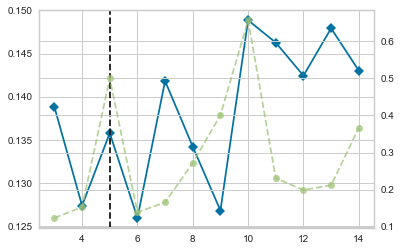

In [10]:
LG = LeadGenerator(train_df, x_val, x_test, y_val, y_test)
LG.fit()

In [27]:
val, test = LG.predict()

Running validation
Running test


In [28]:
val[val["Client"] == 1].sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity,Client
102119,7ae9653a0092ed287d5699446e43ed1899dae68243d4b7...,0.867689,1
19987,fb203a61d486fbc90737eeea6a108416c5f62c4e6dc31c...,0.860311,1
79122,767d91a11f76dd524571b4061e96dae790f8dd4089d4d3...,0.846425,1
117814,7916d9657ba20f9da81d02b21c76cc1b9fc001050a5c52...,0.837733,1
210111,feec91169df886e0b49f9625deb4fbb8614e0002788d8f...,0.824819,1


In [29]:
test[test["Client"] == 1].sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity,Client
108803,d83ba412a5c2b8a6576dd6a5ddf7803f6ccf213ea87170...,0.864696,1
62068,0b749faf34ea949dd29cd76ad5c771c2666765f4b64bad...,0.860311,1
131806,c2c05d613099fac774b9524cb22a79ad74f2543b79679f...,0.858456,1
207779,d5749a6b6e948213a5504c3a58016623cc64f7a3f9898a...,0.852513,1
226279,6acb7ad626bce2a3573df9be04af2b405c84dc630b9087...,0.837510,1


# Validação final

In [30]:
train_df, client_df = separate_data(df, emp_1, train = False)

In [31]:
LG = LeadGenerator(train_df)
LG.fit()

Fit time: 24.989418029785156s.
3 clusters are selected.


In [30]:
predictions = LG.predict_leads(client_df)

In [31]:
predictions.sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity
386947,0c9ea72f9a6a30704ebed8e68e10e9289a3d02bfcaae03...,0.999998
223383,a6fcae02f8653ead50117e29a414e2eb0871b624fd9752...,0.999701
420278,0b8f85a2e4dfd1a43443bb3d248215512766b2e561e905...,0.999701
309066,6c72185f89fd2b605b5e7b0378168dc4b4356d17b0bfda...,0.999701
31692,faa7713f2d4b07c43edecef4790690b0621fe4c1a60fe5...,0.999628


# Salvando conjunto de dados

In [47]:
df.to_csv("data/data_final.csv", index = False)

In [48]:
df.columns

Index(['natureza_juridica_macro', 'sg_uf', 'de_ramo', 'setor', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_nivel_atividade', 'nm_meso_regiao', 'qt_socios',
       'de_faixa_faturamento_estimado', 'qt_filiais', 'id'],
      dtype='object')